In [ ]:
!pip install spacy --quiet
!python -m spacy download es_core_news_sm --quiet


In [ ]:
import spacy
nlp = spacy.load("es_core_news_sm")
import es_core_news_sm
nlp = es_core_news_sm.load()
doc = nlp("Esto es una frase.")
print([(w.text, w.pos_) for w in doc])

# Chatbots basados en recuperación

En inglés information retrieval chatbots

# Motor de búsqueda

* Búsqueda por palabras clave: Extrae palabras clave de la pregunta del usuario y busca coincidencias en las preguntas almacenadas.

* Similitud del coseno: Si has representado las preguntas como vectores (por ejemplo, usando TF-IDF o word embeddings), puedes usar la similitud del coseno para medir la distancia entre las preguntas.

* Word embeddings: Utiliza modelos de word embeddings como Word2Vec o BERT para obtener representaciones semánticas de las preguntas y las consultas del usuario.

### Búsqueda por palabras claves

In [ ]:
tu_diccionario = {
   "hola": "¡Hola! ¿En qué puedo ayudarte?",
   "adiós": "Hasta luego. ¡Que tengas un buen día!",
   "información": "¿Qué tipo de información estás buscando?",
   # Agrega más entradas de diccionario según tus necesidades
}


In [ ]:
def responder_pregunta(pregunta):
    pregunta_procesada = nlp(pregunta.lower())  # Procesa la pregunta y convierte a minúsculas
    respuesta = "Lo siento, no entiendo tu pregunta."

    # Busca una coincidencia en el diccionario
    for palabra in pregunta_procesada:
        # regresa la primer coincidencia que encuentra
        if palabra.text in tu_diccionario:
            respuesta = tu_diccionario[palabra.text]
            break

    return respuesta


In [ ]:
while True:
    entrada_usuario = input("Tú: ")
    if entrada_usuario.lower() == "salir":
        print("Chatbot: Hasta luego.")
        break
    respuesta = responder_pregunta(entrada_usuario)
    print("Chatbot:", respuesta)


## Búsqueda por similitud

Para los chatbots basados ​​en recuperación, es común utilizar bolsas de palabras (bag of words) o tf-idf para calcular la similitud de intenciones.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Datos de ejemplo
preguntas = ["¿Qué es el aprendizaje automático?",
             "¿Cómo funciona la regresión lineal?"]
respuestas = ["El aprendizaje automático es una rama de la inteligencia artificial...",
              "La regresión lineal es un método de modelado..."]

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preguntas)

# Función para encontrar la mejor coincidencia
def responder_pregunta(consulta_usuario):
    consulta_vec = vectorizer.transform([consulta_usuario])
    similitudes = cosine_similarity(consulta_vec, tfidf_matrix).flatten()
    print(similitudes)
    indice_mejor_coincidencia = similitudes.argmax()
    print(indice_mejor_coincidencia)
    return respuestas[indice_mejor_coincidencia]


In [ ]:

# Ejemplo de consulta
consulta = "¿Qué es la regresión lineal?"
print(responder_pregunta(consulta))


## Búsqueda por similitud en embeddings

Puedes vectorizar el texto usando embeddings, como vimos la clase pasada.


# **TP4 - CHATBOT** 🤖
Krabbe Valentina - 45207992

## Actividades

### 1) Elaborar un dataset de preguntas y respuestas para crear un Chatbot para un aplicación particular. ( 3 puntos )

1.1 Debe definir la aplicación (atención al cliente bancario, atención a estudiantes universitarios, etc).
1.2 El listado de preguntas y respuestas debe tener como mínimo 20 elementos pregunta - respuesta.

###  2) Crear el chatbot utilizando TFIDF y similitud del coseno. (1 punto)

### 3) Crear otro chatbot utilizando embeddings. Indique cuál embedding (1 punto) pre-entrenado eligió.

### 4) Muestra ambos chatbots funcionando (1 punto)

Adjuntar la lista de preguntas utilizadas para probar el funcionamiento.

### 5) Añade tus conclusiones de todo lo realizado (2 punto)

### 6) BONUS: usa lo realizado en 1 y 3 para crear un chatbot RAG. (2 puntos)

* Utiliza un modelo LLM pre-entrenado.

* Este punto no es obligatorio de realizar para quienes quieran regularizar / recuperar y luego rendirán en mesa.
* Para quienes tienen condiciones para promocionar (han realizado y entregado los TPs a tiempo) la resolución de este ejercicio será tenida en cuenta para sumar a la promoción.

### 7) No olvides:

* Explicar tus decisiones y configuraciones. Añadir tus conclusiones.
* Anunciar en el foro cuál será tu aplicación y postear tu entrega y tus avances.
* Debes subir tu notebook a un repo GitHub público de tu propiedad compartido + enlace colab.
* Documentar todo el proceso.





1.  La aplicación que voy a usar para este Chatbot es de Atención al cliente en el Patio Cervecero- Restobar donde trabajo. Tienen variedad de comida y de cervezas artesanales. Cuándo se llena mucho no tienen tiempo de contestar los mensajes por lo que algo asi les seria util.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

In [ ]:
#Raw de GitHub
url= 'https://raw.githubusercontent.com/valentina-krabbe/Procesamiento-de-Habla/fe11adea9243827df208396b85768367460d089f/datasetTP4.xlsx'

#Cargamos el dataset
df= pd.read_excel(url)
df

In [ ]:
#Identificamos las columnas del df para mas comodidad
preg= df['Pregunta']
resp= df['Respuesta']

2. Creo el chatbot utilizando TFIDF y similitud del coseno

In [ ]:
vectorizer=TfidfVectorizer()
tfidf_matrix=vectorizer.fit_transform(preg)

#Funcion para procesar la pregunta y buscar la respuesta
def responder_pregunta(consulta_user):
  consulta_vec=vectorizer.transform([consulta_user])
  similitudes=cosine_similarity(consulta_vec,tfidf_matrix).flatten()
  indice_mejor_coincidencia=similitudes.argmax()
  return resp[indice_mejor_coincidencia]

#Prueba
consulta='¿Dónde están ubicados?'
print(responder_pregunta(consulta))

3. Creo otro chatbot utilizando embeddings.

  **embedding pre-entrenado elegido: intfloat/multilingual-e5-large**

In [ ]:
#Importamos la clase sentence_transformers para trabajr con embeddings
from sentence_transformers import SentenceTransformer
#Importamos la funcion cos_sim  para calcular a similitud del coseno entre embeddings
from sentence_transformers.util import cos_sim
#Importo la libreria torch para gestionar  la cpu y gpu
import torch

#Cargamos el modelo
model= SentenceTransformer('intfloat/multilingual-e5-large')

#Configuramos los dispositivos CPU y GPU
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo:{device}')

model.to(device) #Movemos el modelo al dispositivo seleccionado

#Manejo de nulos
pregu_corpus=preg.fillna('').astype(str).apply(lambda x:'query: '+x).tolist()

#Con esta linea tomamos todas las preguntas, las convertimos en una lista de py.
#Usamos el modelo para transformar cada ? de la lista en u vector numerico, ademas nos aseguramos de que se almacenen como un tendor de PyTorch.
#Y finalmente mueve ese tensor de embedding al mismo dispositivo donde esta el modelo y donde se hacen los calcuos de similitud.
preg_embedding=model.encode(pregu_corpus, convert_to_tensor=True).to(device)

#Definimos la funcion  que toma la consulta del cliente y busca la respuesta
def resp_embeddings(consulta_user):
  saludo= consulta_user.lower().strip() #esto convierte la consulta a minusculas y elimina espacios en blanco al principio y final.
  #Saludos entrada clientes
  if saludo in ['hola', 'Hola', 'buenas noches', 'holaa', 'Holaa',
                'como estas?', 'Como estas?', 'cómo estas?', '¿Cómo estas?', '¿como estas?', '¿Como estas?', '¿cómo estas?', '¿Cómo estas?',
                'como estan?', 'Como estan?', 'cómo estan?', '¿Cómo estan?', '¿como estan?', '¿Como estan?', '¿cómo estan?', '¿Cómo estan?',
                'Buenas', 'Buenass', 'Buenas noches', 'buenas noches']:
    return ('¡Hola! Somos Por Ahí-Patio Cervecero 🍻, ¿en qué podemos ayudarte? 😊', None, None)

  else:
    #Generamos el embedding de la consulta del cliente
    consulta_con_prefijo='query: '+consulta_user
    consulta_embedding=model.encode(consulta_con_prefijo, convert_to_tensor=True).to(device)
    #Calculo la similitud del coseno entre la consulta del cliente y las preguntas existentes en el dataset
    similitudes=cos_sim(consulta_embedding, preg_embedding)[0]

    #Encontramos el indice de la pregunta con mayor similitud
    indice_mejor_coinc=similitudes.argmax().item()
    score_mejor_coinc = similitudes[indice_mejor_coinc].item() # Obtener el score

    #Umbral
    if score_mejor_coinc > 0.8:
      respuesta_texto = resp[indice_mejor_coinc]

    else:
      respuesta_texto="Perdón, no encuentro una respuesta clara para tu pregunta. ¿Podes reformularla?"

    return(respuesta_texto, score_mejor_coinc, indice_mejor_coinc)


#Funcion para imprimir resultados detallados del chatbot
def print_result(query_text, response_tuple):
    response, score, index = response_tuple
    print(f'\nPregunta procesada:  {query_text}')
    if score is not None: # Si no es un saludo (tiene score e índice)
        print(f'Similitud máxima:    {score:.4f}')
        print(f'Índice en dataset:   {index}')
    print(f'Respuesta sugerida:  {response}')

    if score is not None:
      print(f"({score}, {index}, '{response}')")

#Probamos
print_result('cuánto estan las hamburguesas?', resp_embeddings('cuánto estan las hamburguesas?'))
print_result('¿que hamurguesas hay?', resp_embeddings('¿que hamurguesas hay?'))
print_result('¿Que cervezs vende?', resp_embeddings('¿Que cervezs vende?'))
print_result('venden cerveza?', resp_embeddings('venden cerveza?'))
print_result('¿Y IPA?', resp_embeddings('¿Y IPA?'))
print_result('hola', resp_embeddings('hola'))
print_result('dame la hora', resp_embeddings('dame la hora'))

- 'query:' Los modelos E5 fueron entrenados de una manera especifica, esperan que cada pieza de texto que se les pase tenga un prefijo que indicara su rol.
Si el texto es una pregunta o una busqueda, se le asigna 'query:'

Si el texto es un parrafo mas largo o un documento se le pone: 'passage:'

Si no le damos este prefijo, el modelo no va a activar su modo de entendimiento optimo para ese rol y los embeddings que produzca seran de mala calidad.

4) Muestra ambos chatbots funcionando (1 punto)
Adjuntar la lista de preguntas utilizadas para probar el funcionamiento.

In [ ]:
def responder_pregunta_tfidf(consulta_user):
  saludo=consulta_user.lower().strip()
  if saludo in ['hola', 'Hola', 'buenas noches', 'holaa', 'Holaa',
                'como estas?', 'Como estas?', 'cómo estas?', '¿Cómo estas?', '¿como estas?', '¿Como estas?', '¿cómo estas?', '¿Cómo estas?',
                'como estan?', 'Como estan?', 'cómo estan?', '¿Cómo estan?', '¿como estan?', '¿Como estan?', '¿cómo estan?', '¿Cómo estan?',
                'Buenas', 'Buenass', 'Buenas noches', 'buenas noches']:
    return ('¡Hola! Somos Por Ahí-Patio Cervecero 🍻, ¿en qué podemos ayudarte? 😊', None, None)

  consulta_vec=vectorizer.transform([consulta_user])
  similitudes=cosine_similarity(consulta_vec,tfidf_matrix).flatten()
  indice_mejor_coincidencia=similitudes.argmax()
  score_mejor_coinc=similitudes[indice_mejor_coincidencia]

  if score_mejor_coinc > 0.7:
    respuesta_texto=resp[indice_mejor_coincidencia]
  else:
    respuesta_texto="Perdón, no encuentro una respuesta clara para tu pregunta. ¿Podes reformularla?"

  return(respuesta_texto, score_mejor_coinc, indice_mejor_coincidencia)


In [ ]:
def responder_embeddings(consulta_user):
  saludo= consulta_user.lower().strip() #esto convierte la consulta a minusculas y elimina espacios en blanco al principio y final.
  #Saludos entrada clientes
  if saludo in ['hola', 'Hola', 'buenas noches', 'holaa', 'Holaa',
                'como estas?', 'Como estas?', 'cómo estas?', '¿Cómo estas?', '¿como estas?', '¿Como estas?', '¿cómo estas?', '¿Cómo estas?',
                'como estan?', 'Como estan?', 'cómo estan?', '¿Cómo estan?', '¿como estan?', '¿Como estan?', '¿cómo estan?', '¿Cómo estan?',
                'Buenas', 'Buenass', 'Buenas noches', 'buenas noches']:
    return ('¡Hola! Somos Por Ahí-Patio Cervecero 🍻, ¿en qué podemos ayudarte? 😊', None, None)

  else:
    #Generamos el embedding de la consulta del cliente
    consulta_con_prefijo='query: '+consulta_user
    consulta_embedding=model.encode(consulta_con_prefijo, convert_to_tensor=True).to(device)
    #Calculo la similitud del coseno entre la consulta del cliente y las preguntas existentes en el dataset
    similitudes=cos_sim(consulta_embedding, preg_embedding)[0]

    #Encontramos el indice de la pregunta con mayor similitud
    indice_mejor_coinc=similitudes.argmax().item()
    score_mejor_coinc = similitudes[indice_mejor_coinc].item() # Obtener el score

    #Umbral
    if score_mejor_coinc > 0.8:
      respuesta_texto = resp[indice_mejor_coinc]

    else:
      respuesta_texto="Perdón, no encuentro una respuesta clara para tu pregunta. ¿Podes reformularla?"

    return(respuesta_texto, score_mejor_coinc, indice_mejor_coinc)


In [ ]:
#lista de preguntas para los modelos
preguntas_test=[
    'hola', 'buenaas', 'en que horario atienden?', 'que dias?',
    '¿Y IPA?', 'Cuánto sal la pizza?', '¿Aceptas pago con tarjeta?', 'esta lloviendo hoy?',
    'y ENGLish'
]

print('--------------------Punto 4--------------------')
for i, q in enumerate(preguntas_test):
  print(f'{i+1}.{q}')

print('---------------------------------------------------------')

print('👋🤖 ¡Hola! Soy tu asistente del mejor bar de la ciudad, si hablo de Por Ahí - Patio Cervecero. ¿En que puedo ayudarte?')
for pregunta in preguntas_test:
    respuesta_tupla_tfidf = responder_pregunta_tfidf(pregunta)
    respuesta_texto_tfidf = respuesta_tupla_tfidf[0] # Extraemos solo el texto
    print(f"Usuario: {pregunta}\nChatbot (TF-IDF): {respuesta_texto_tfidf}\n")
print('---------------------------------------------------------')
print('👋🤖 ¡Hola! Soy tu asistente del mejor bar de la ciudad, si hablo de Por Ahí - Patio Cervecero. ¿En que puedo ayudarte?')
for pregunta in preguntas_test:
    respuesta_tupla_e5 = responder_embeddings(pregunta)
    respuesta_texto_e5 = respuesta_tupla_e5[0] # Extraemos solo el texto
    print(f"Usuario: {pregunta}\nChatbot (E5): {respuesta_texto_e5}\n")

# 5. **CONCLUSIONES**

### **Chat Bot TF-IDF**
Este modelo es bueno cuando el cliente pregunta casi  o exactamente lo que tengo en mi columna 'preguntas'. Cuando es mas o menos identica. Pero la verdad es muy limitado, si la pregunta varia un poco la respuesta casi nunca va a ser precisa, o si no entra en el umbral de similitud establecido dirá que no puede entender la pregunta.

### **Chat Bot Embeddings**

Primero probe con el modelo preentrenado 'all-MiniLM-L6-v2' y no dio muy buenos resultados, termine optando por el modelo 'intfloat/multilingual-e5-large' que mostro mejoras bastante notables.

Por ejemplo en la pregunta 'en qué horario atienden?', el chatbot responde correctamente: 'Nuestro horario de atención es de 20hs a 01hs'.

En este punto me sorprendio:

- Usuario: ¿Y IPA?
- Chatbot (E5): No, por ahora trabajamos únicamente con retiro por el local.

En resumen el chatbot con embeddings fue el que mejor funciono y logro encontrar respuestasa preguntas no muy exactas y formuladas correctamente.

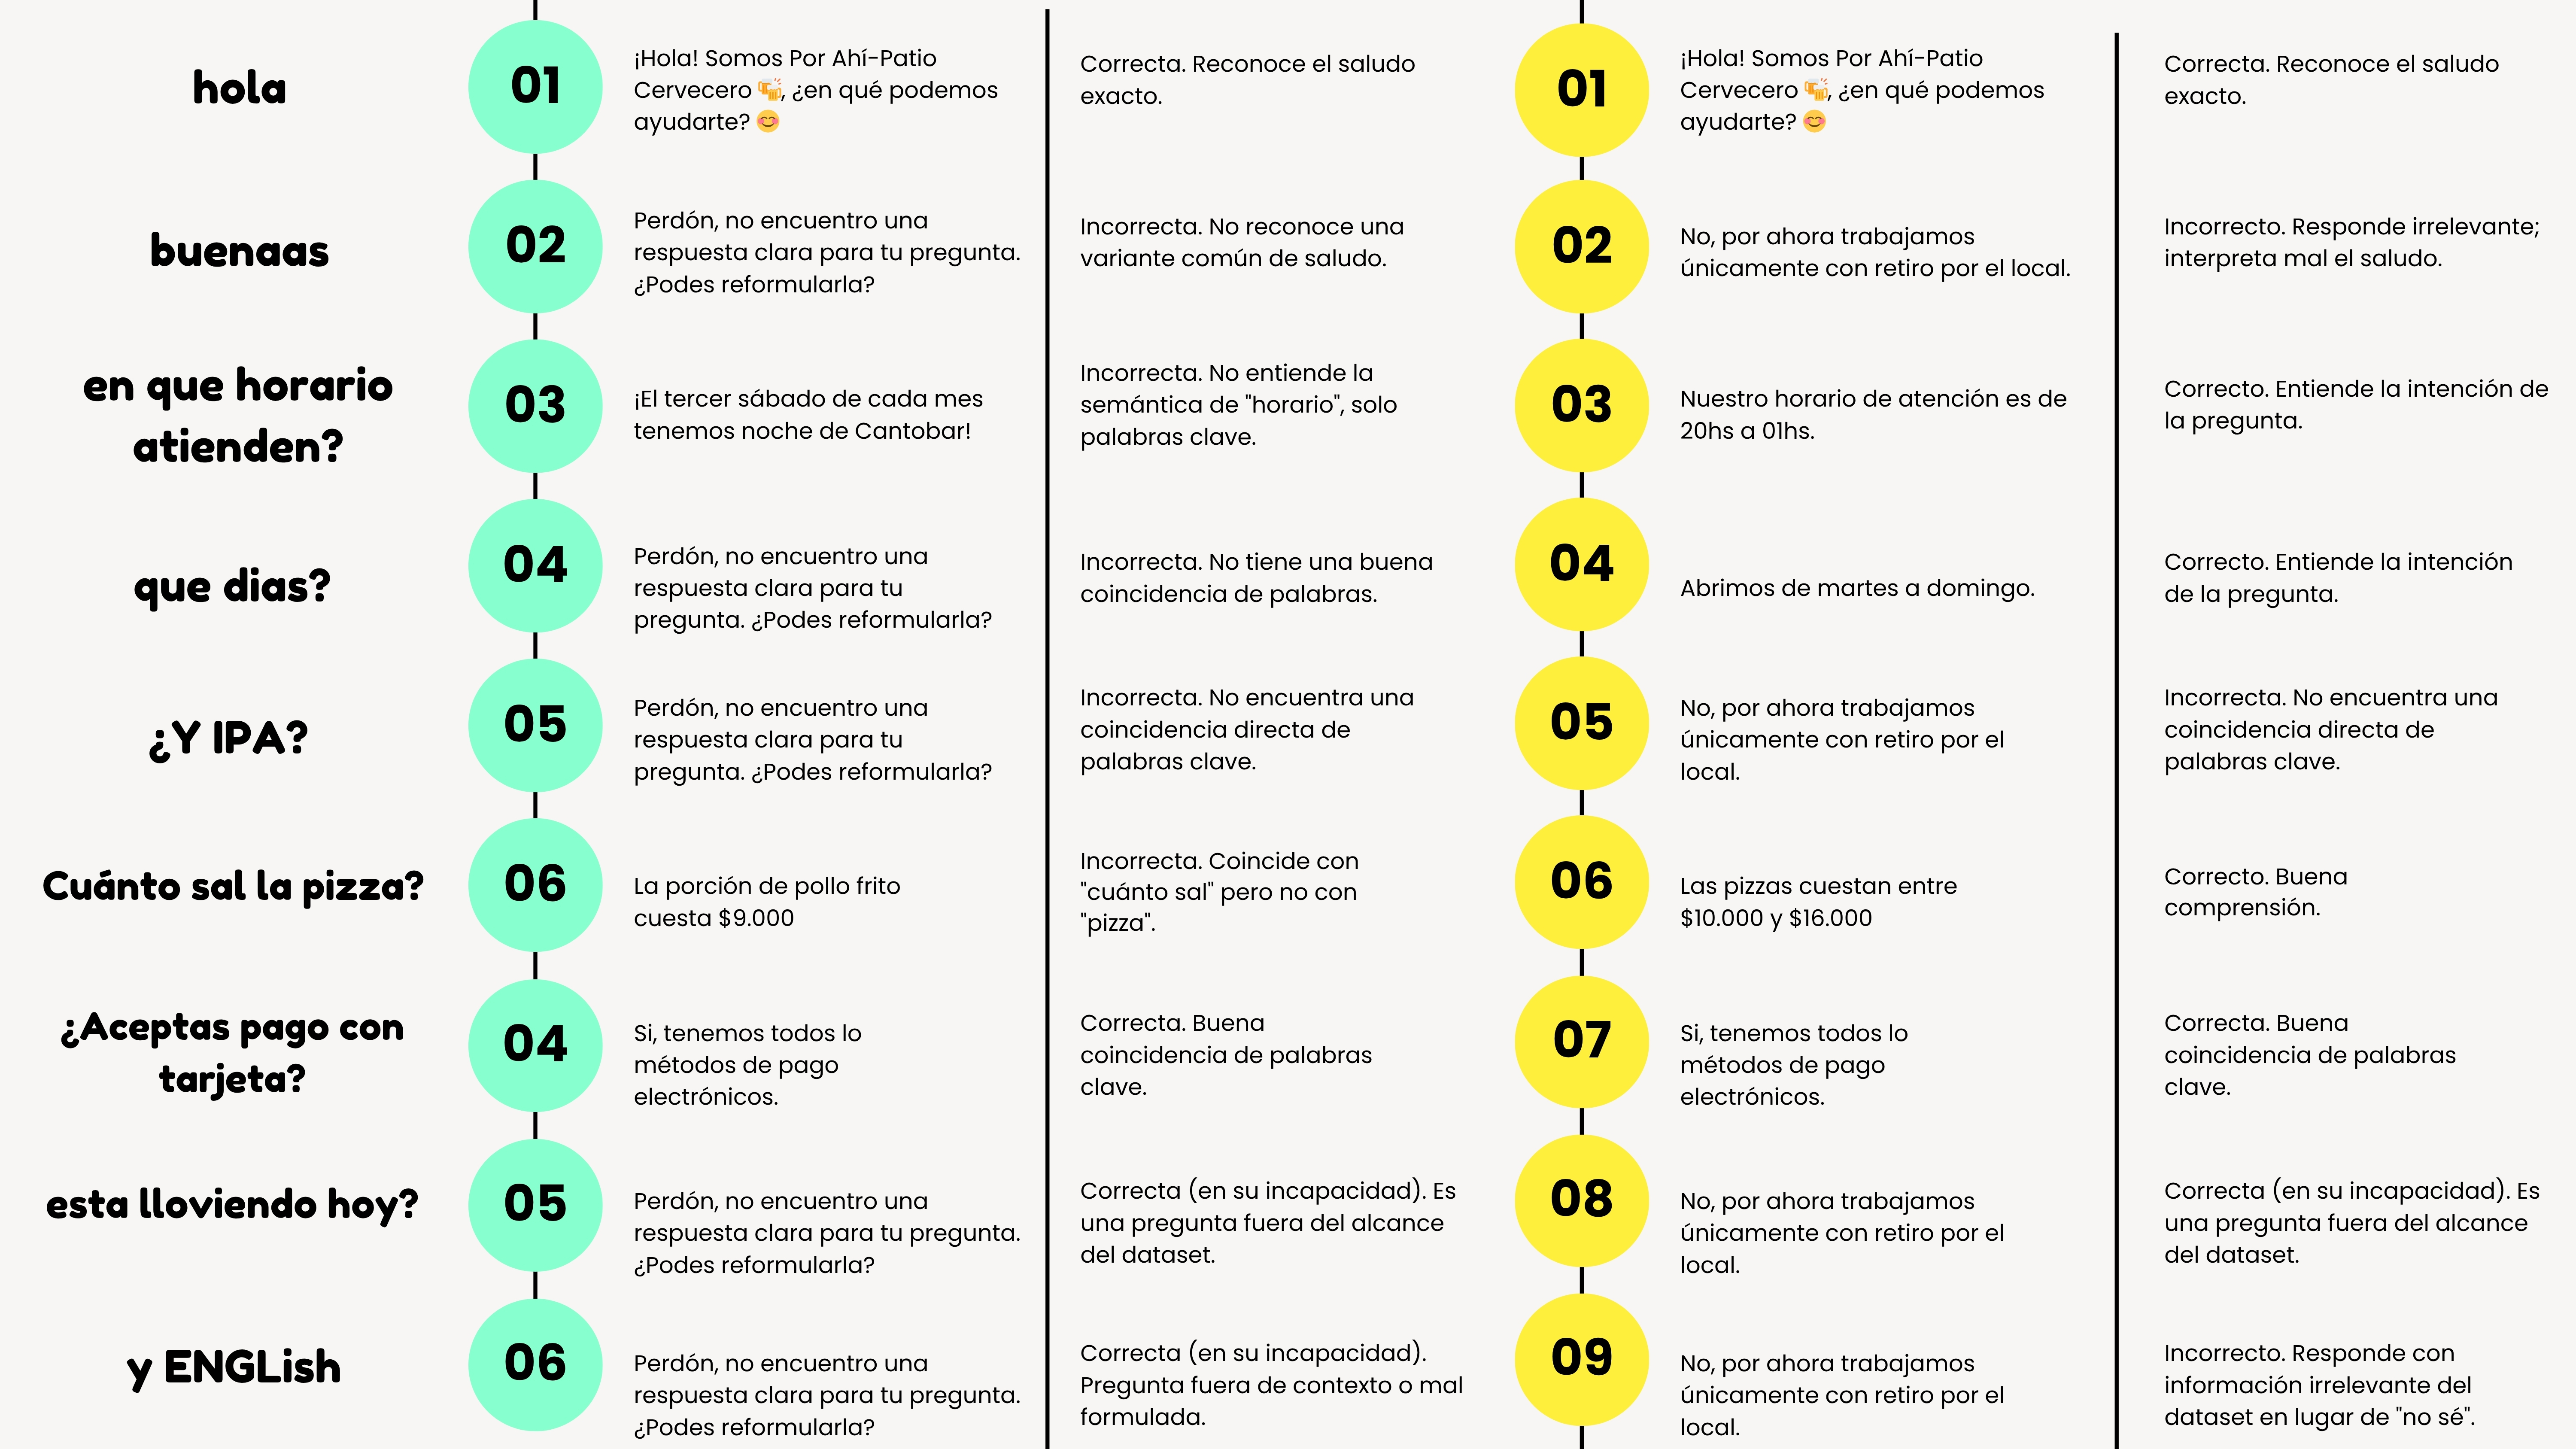